In [ ]:
!pip install yfinance
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit_aer
!pip install pylatexenc==2.10.1
!pip install qiskit_algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pylatexenc==2.10.1 (from versions: 0.9, 1.0, 1.0.post1, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0, 2.0.post1, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 2.10, 3.0a13, 3.0a14, 3.0a15, 3.0a17, 3.0a18, 3.0a19, 3.0a21, 3.0a22, 3.0a23, 3.0a24, 3.0a25, 3.0a26, 3.0a27, 3.0a28, 3.0a29, 3.0a30, 3.0a31, 3.0a32)
ERROR: No matchi

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.regressors import VQR
from qiskit_machine_learning.utils.loss_functions import L2Loss
from qiskit_algorithms.optimizers import COBYLA
from sklearn.preprocessing import MinMaxScaler

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open   Volume
Ticker              F          F          F          F        F
Date                                                           
2000-01-03  11.945576  12.130889  11.888556  12.031105  4056814
2000-01-04  11.546440  11.917066  11.475165  11.817283  7322428
2000-01-05  11.589211  11.746014  11.574956  11.631976  5038354
2000-01-06  11.603458  11.817281  11.489419  11.631968  4545037
2000-01-07  12.458751  12.544280  11.888556  11.974085  9266037
Price         Close         High          Low         Open        Volume
Ticker            F            F            F            F             F
count   5989.000000  5989.000000  5989.000000  5989.000000  5.989000e+03
mean       7.275525     7.378388     7.174988     7.281860  4.295161e+07
std        2.778844     2.812697     2.741063     2.773623  3.746563e+07
min        0.674058     0.829199     0.540316     0.700806  1.024300e+06
25%        5.222599     5.314058     5.139394     

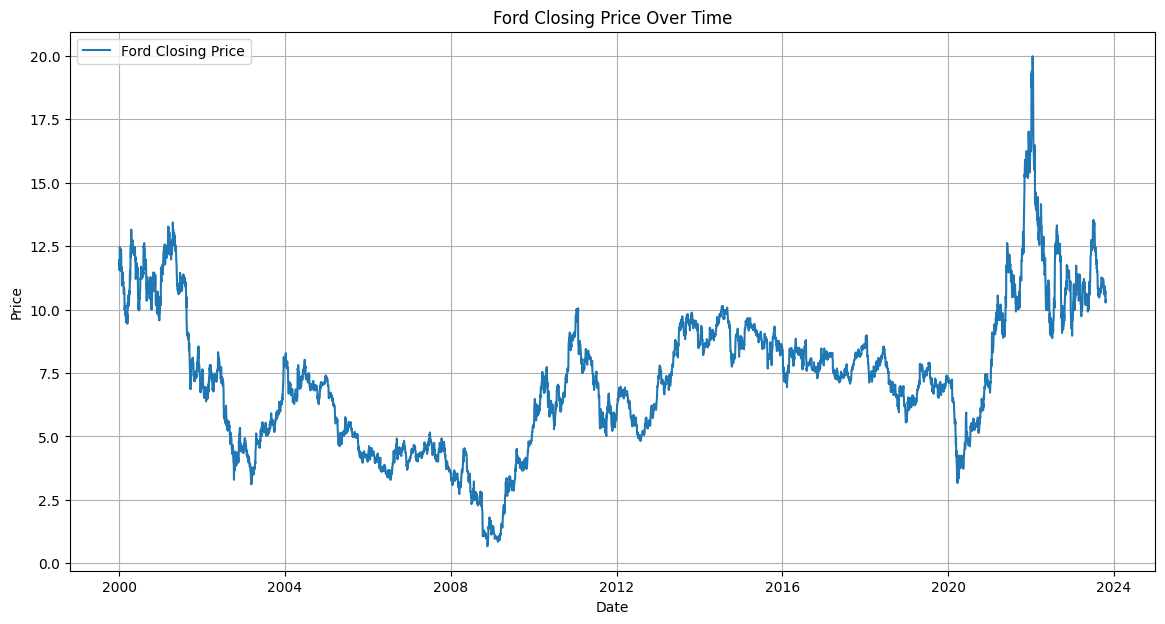

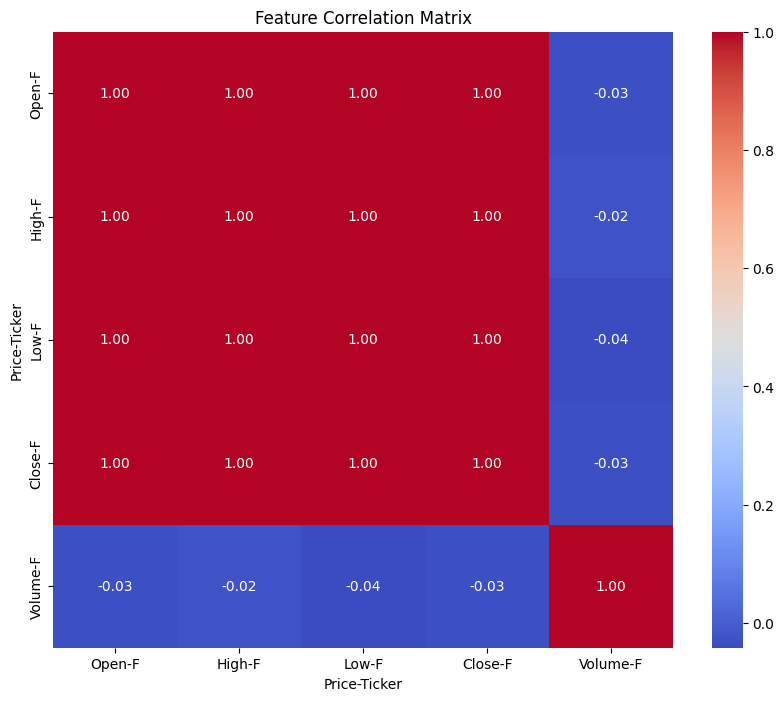

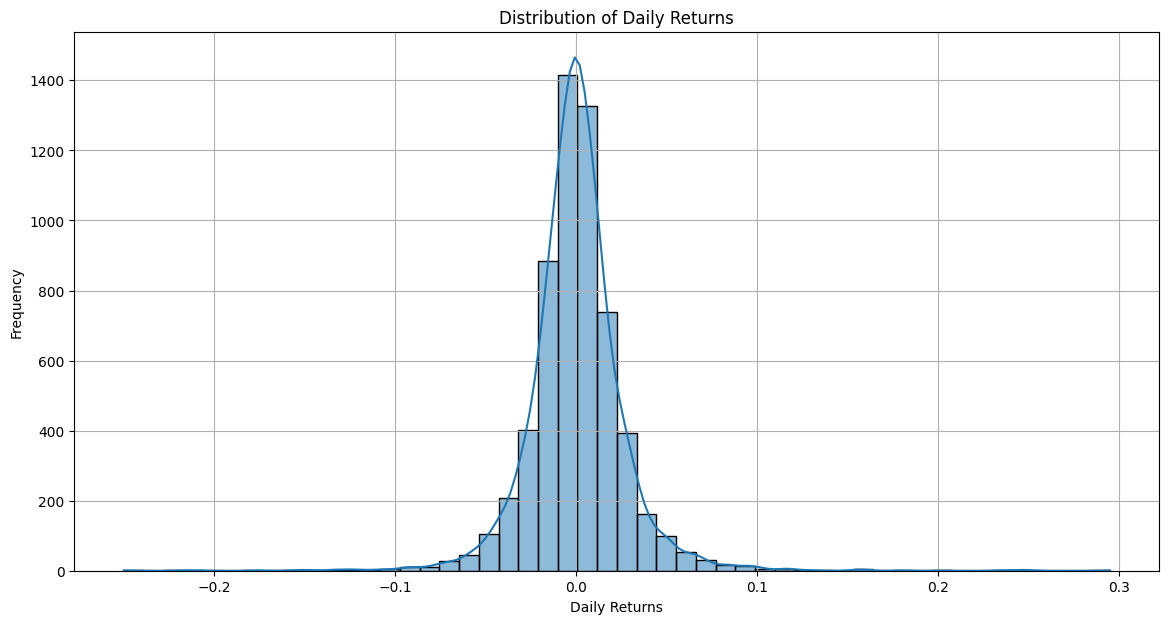

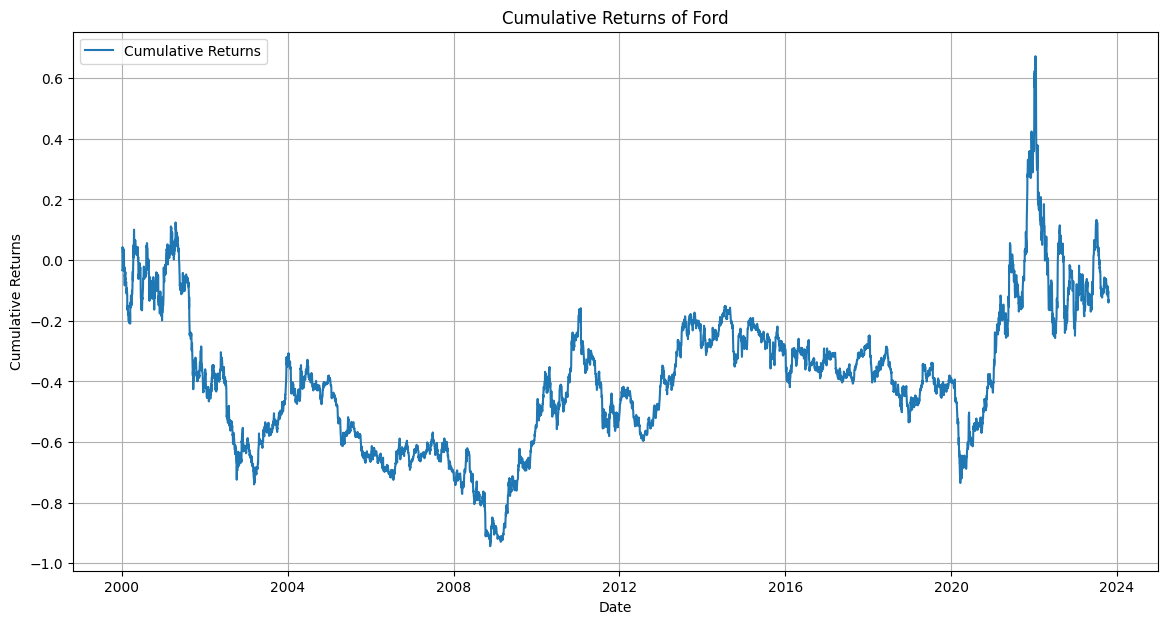

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'F'
data = yf.download(ticker, start='2000-01-01', end='2023-10-22')

print(data.head())
print(data.describe())

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Ford Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ford Closing Price Over Time')
plt.legend()
plt.grid()
plt.show()

data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

plt.figure(figsize=(10, 8))
correlation = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot(data['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid()
plt.show()

cumulative_returns = (1 + data['Return']).cumprod() - 1
plt.figure(figsize=(14, 7))
plt.plot(data.index, cumulative_returns, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Ford')
plt.legend()
plt.grid()
plt.show()


In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-aer[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=9621a57a6c8f06cd128697a45f5b62c504e989d53c22c96c2fce8e84bff17ae3
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


[*********************100%***********************]  1 of 1 completed


     ┌────────┐
q_0: ┤ Ry(x0) ├
     ├────────┤
q_1: ┤ Ry(x1) ├
     ├────────┤
q_2: ┤ Ry(x2) ├
     ├────────┤
q_3: ┤ Ry(x3) ├
     ├────────┤
q_4: ┤ Ry(x4) ├
     └────────┘


<ipython-input-5-11e58b3128b7>:48: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=circuit, input_params=input_params)


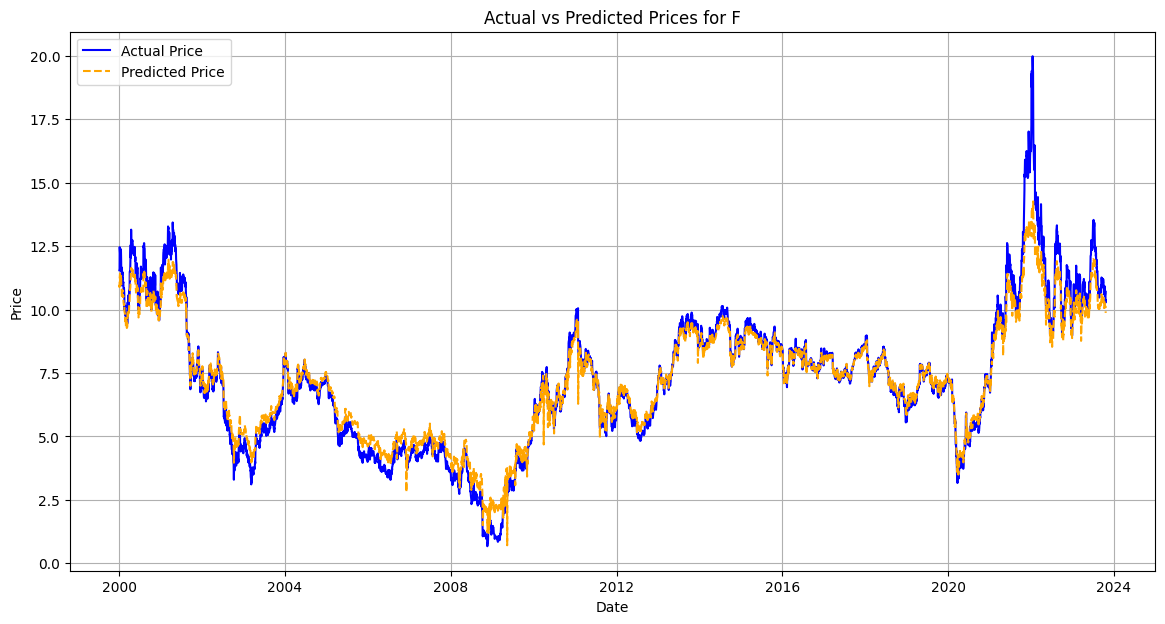

Root Mean Squared Error: 0.585803551249759


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_aer import Aer
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.regressors import VQR
from qiskit_machine_learning.utils.loss_functions import L2Loss
from qiskit_algorithms.optimizers import COBYLA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

ticker = 'F'
data = yf.download(ticker, start='2000-01-01', end='2023-10-22')

data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features].values
y = data['Close'].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

def create_quantum_circuit(num_qubits):
    params = [Parameter(f'x{i}') for i in range(num_qubits)]
    qc = QuantumCircuit(num_qubits)
    for i, param in enumerate(params):
        qc.ry(param, i)
    return qc, params

num_qubits = len(features)

backend = Aer.get_backend('aer_simulator')
circuit, input_params = create_quantum_circuit(num_qubits)

print(circuit)
circuit.draw('mpl')

qnn = EstimatorQNN(circuit=circuit, input_params=input_params)
regressor = VQR(optimizer=COBYLA(maxiter=100), feature_map=circuit, ansatz=RealAmplitudes(num_qubits), loss=L2Loss())

regressor.fit(X_normalized, y_normalized)

predicted_prices_normalized = regressor.predict(X_normalized)

predicted_prices = scaler_y.inverse_transform(predicted_prices_normalized.reshape(-1, 1)).flatten()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Price', color='blue')
plt.plot(data.index, predicted_prices, label='Predicted Price', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices for {ticker}')
plt.legend()
plt.grid()
plt.show()

rmse = np.sqrt(mean_squared_error(data['Close'], predicted_prices))
print(f'Root Mean Squared Error: {rmse}')


[*********************100%***********************]  1 of 1 completed
<ipython-input-7-5eb72b13f87a>:55: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=circuit, input_params=input_params)


     ┌────────┐     ┌────────┐                              
q_0: ┤ Ry(x0) ├──■──┤ Ry(x0) ├──────────────────────────────
     ├────────┤┌─┴─┐└────────┘┌────────┐                    
q_1: ┤ Ry(x1) ├┤ X ├────■─────┤ Ry(x1) ├────────────────────
     ├────────┤└───┘  ┌─┴─┐   └────────┘┌────────┐          
q_2: ┤ Ry(x2) ├───────┤ X ├───────■─────┤ Ry(x2) ├──────────
     ├────────┤       └───┘     ┌─┴─┐   └────────┘┌────────┐
q_3: ┤ Ry(x3) ├─────────────────┤ X ├───────■─────┤ Ry(x3) ├
     ├────────┤                 └───┘     ┌─┴─┐   ├────────┤
q_4: ┤ Ry(x4) ├───────────────────────────┤ X ├───┤ Ry(x4) ├
     └────────┘                           └───┘   └────────┘


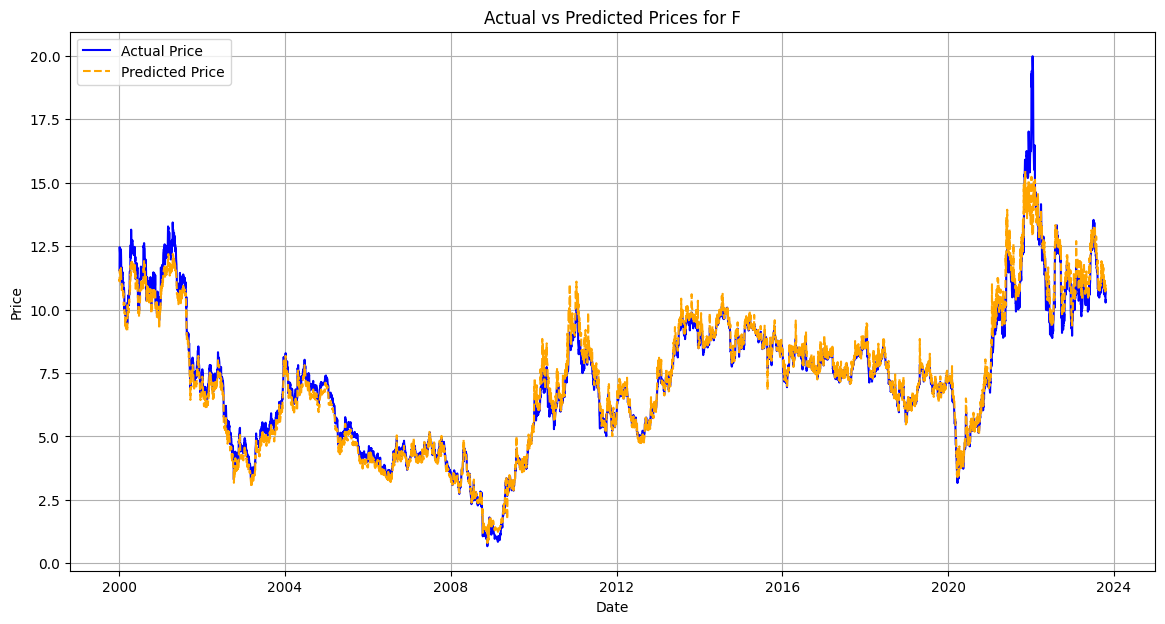

Root Mean Squared Error: 0.45131259392431466


In [ ]:

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_aer import Aer
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.regressors import VQR
from qiskit_machine_learning.utils.loss_functions import L2Loss
from qiskit_algorithms.optimizers import COBYLA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

ticker = 'F'
data = yf.download(ticker, start='2000-01-01', end='2023-10-22')

data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features].values
y = data['Close'].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Normalize y as well

def create_modified_quantum_circuit(num_qubits):
    params = [Parameter(f'x{i}') for i in range(num_qubits)]
    qc = QuantumCircuit(num_qubits)

    for i, param in enumerate(params):
        qc.ry(param, i)

    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)

    for i, param in enumerate(params):
        qc.ry(param, i)

    return qc, params

num_qubits = len(features)

backend = Aer.get_backend('aer_simulator')
circuit, input_params = create_modified_quantum_circuit(num_qubits)

print(circuit)

qnn = EstimatorQNN(circuit=circuit, input_params=input_params)
regressor = VQR(optimizer=COBYLA(maxiter=100), feature_map=circuit, ansatz=RealAmplitudes(num_qubits), loss=L2Loss())

regressor.fit(X_normalized, y_normalized)

predicted_prices_normalized = regressor.predict(X_normalized)

predicted_prices = scaler_y.inverse_transform(predicted_prices_normalized.reshape(-1, 1)).flatten()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Price', color='blue')
plt.plot(data.index, predicted_prices, label='Predicted Price', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices for {ticker}')
plt.legend()
plt.grid()
plt.show()

rmse = np.sqrt(mean_squared_error(data['Close'], predicted_prices))
print(f'Root Mean Squared Error: {rmse}')


[*********************100%***********************]  1 of 1 completed
<ipython-input-8-22b699cdc858>:52: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=circuit, input_params=input_params)


     ┌─────────────┐                    
q_0: ┤ Ry(input_0) ├──■─────────────────
     ├─────────────┤┌─┴─┐               
q_1: ┤ Ry(input_1) ├┤ X ├──■────────────
     ├─────────────┤└───┘┌─┴─┐          
q_2: ┤ Ry(input_2) ├─────┤ X ├──■───────
     ├─────────────┤     └───┘┌─┴─┐     
q_3: ┤ Ry(input_3) ├──────────┤ X ├──■──
     ├─────────────┤          └───┘┌─┴─┐
q_4: ┤ Ry(input_4) ├───────────────┤ X ├
     └─────────────┘               └───┘


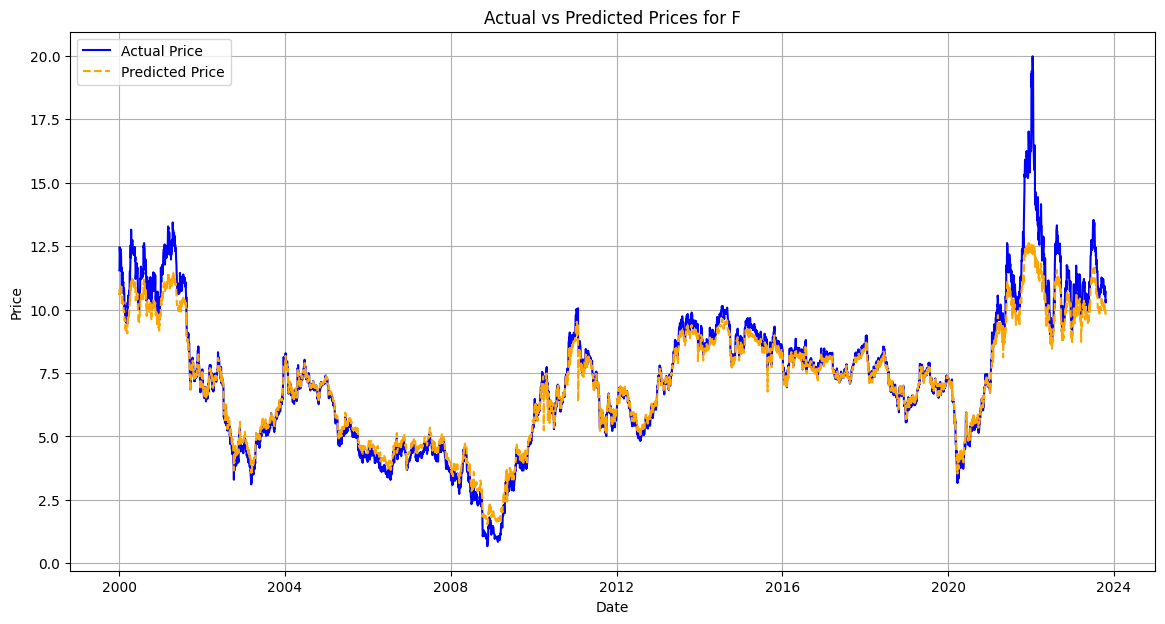

Root Mean Squared Error: 0.6630506628276122


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.regressors import VQR
from qiskit_machine_learning.utils.loss_functions import L2Loss
from qiskit_algorithms.optimizers import COBYLA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

ticker = 'F'
data = yf.download(ticker, start='2000-01-01', end='2023-10-22')

data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features].values
y = data['Close'].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

def create_simple_quantum_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)

    input_params = [Parameter(f'input_{i}') for i in range(num_qubits)]

    for i, param in enumerate(input_params):
        qc.ry(param, i)

    for qubit in range(num_qubits - 1):
        qc.cx(qubit, qubit + 1)

    return qc, input_params

num_qubits = len(features)

backend = Aer.get_backend('aer_simulator')
circuit, input_params = create_simple_quantum_circuit(num_qubits)

print(circuit)

qnn = EstimatorQNN(circuit=circuit, input_params=input_params)
regressor = VQR(optimizer=COBYLA(maxiter=100), feature_map=circuit, loss=L2Loss())

regressor.fit(X_normalized, y_normalized)

predicted_prices_normalized = regressor.predict(X_normalized)

predicted_prices = scaler_y.inverse_transform(predicted_prices_normalized.reshape(-1, 1)).flatten()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Price', color='blue')
plt.plot(data.index, predicted_prices, label='Predicted Price', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices for {ticker}')
plt.legend()
plt.grid()
plt.show()

rmse = np.sqrt(mean_squared_error(data['Close'], predicted_prices))
print(f'Root Mean Squared Error: {rmse}')
